In [ ]:
#CatBoost训练10000次
#2791.6345
#CatBoost训练1000次
#16044.4139
#CatBoost训练30000次
#2326.2931
#tsfresh, XGBoost，n_estimators=2000
#547.0449
#tsfresh, XGBoost, n_estimators=2000，最大值转为1，其他为0
#376.0000
#tsfresh, XGBoost, n_estimators=2500，最大值转为1，其他为0
#364.0000

In [ ]:
import sys
sys.path.append('/home/aistudio/external-libraries/catboost103')
sys.path.append('/home/aistudio/external-libraries/ipywidgets')
sys.path.append('/home/aistudio/external-libraries/bayesian-optimization')
sys.path.append('/home/aistudio/external-libraries/toad')
sys.path.append('/home/aistudio/external-libraries/pandas-profiling')
sys.path.append('/home/aistudio/external-libraries/tsfresh')

In [ ]:
import numpy as np
import pandas as pd
import pickle
%matplotlib inline
import matplotlib # 注意这个也要import一次
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, mean_squared_error, roc_curve, auc
from sklearn.model_selection import train_test_split
import gc


import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_data = pd.read_csv('./data/data133887/train.csv')
test_data = pd.read_csv('./data/data133887/testA.csv')

In [ ]:
data = pd.concat((train_data, test_data))

In [ ]:
data.columns

Index(['id', 'heartbeat_signals', 'label'], dtype='object')

In [ ]:
data = pd.DataFrame(data['heartbeat_signals'].str.split(',').tolist(), index=data['id'], dtype='float')

In [ ]:
data['label'] = train_data['label']

In [ ]:
# data.iloc[:, 0:205] = data.iloc[:, 0:205].astype(float)

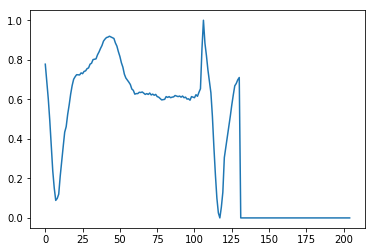

In [ ]:
plt.plot(data.iloc[10, 0:205])

In [ ]:
##保存数据data
# with open('./work/features/data.pkl', 'wb') as file:
#     pickle.dump(data, file) 

#### 手动提取特征

In [ ]:
data_des = data.drop(['isDefault'], axis=1).T.describe().T

In [ ]:
data_des.drop(['count'], axis=1, inplace=True)

In [ ]:
##保存数据data_des
# with open('./work/features/data_des.pkl', 'wb') as file:
#     pickle.dump(data_des, file) 

### 提取数据

In [ ]:
# with open('./work/features/data.pkl', 'rb') as file:
#     data = pickle.load(file)

# with open('./work/features/data_des.pkl', 'rb') as file:
#     data_des = pickle.load(file)

In [ ]:
# data = pd.merge(data, data_des, left_index=True, right_index=True)
# del data_des

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,196,197,198,199,200,201,202,203,204,label
id,,,,,,,,,,,,,,,,,,,,,
0,0.991230,0.943533,0.764677,0.618571,0.379632,0.190822,0.040237,0.025995,0.031709,0.065524,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.971482,0.928969,0.572933,0.178457,0.122962,0.132360,0.094392,0.089575,0.030481,0.040499,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.959149,0.701378,0.231778,0.000000,0.080698,0.128376,0.187448,0.280826,0.328261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.975795,0.934088,0.659637,0.249921,0.237116,0.281445,0.249921,0.249921,0.241397,0.230670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.055816,0.261294,0.359847,0.433143,0.453698,0.499004,0.542796,0.616904,0.676696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,1.000000,0.833028,0.634047,0.639118,0.623852,0.598042,0.613583,0.623852,0.628958,0.623852,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
119996,1.000000,0.825971,0.452105,0.082227,0.000000,0.137119,0.201082,0.165688,0.158125,0.165688,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
119997,0.951745,0.916261,0.667525,0.351985,0.255330,0.197383,0.173536,0.141934,0.134542,0.127112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
data.reset_index(inplace=True)

In [ ]:
#切分数据
X_train = data[data['label'].notnull()].drop(['label'], axis=1)
y_train = data[data['label'].notnull()]['label']

X_test = data[data['label'].isnull()].drop(['label'], axis=1)

In [ ]:
X_train_m = X_train.melt(id_vars=['id'], #value_vars=[range(0, 205)],
                       var_name='time', value_name='heartbeat_signals', 
                       ignore_index=False).sort_values(by=['id', 'time'], ascending=True)

X_test_m = X_test.melt(id_vars=['id'], #value_vars=[range(0, 205)],
                     var_name='time', value_name='heartbeat_signals',
                     ignore_index=False).sort_values(by=['id', 'time'], ascending=True)

In [ ]:
%matplotlib inline

import matplotlib.pylab as plt

from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
extraction_settings = ComprehensiveFCParameters()
batch_size = 2000
sample_len = 205

In [ ]:
features_train = pd.DataFrame()
for i in range(0, X_train_m.shape[0], batch_size * sample_len):
    start_ids = i
    end_ids = start_ids + batch_size * sample_len
    print('start_ids:{}, end_ids:{}'.format(start_ids, end_ids))

    temp_df = X_train_m.iloc[start_ids:end_ids]

    temp_df = extract_features(temp_df, column_id='id', column_sort='time',
                     default_fc_parameters=extraction_settings,
                     # we impute = remove all NaN features automatically
                     impute_function=impute)
    features_train = features_train.append(temp_df)
    del temp_df
    gc.collect()

start_ids:0, end_ids:410000


Feature Extraction: 100%|██████████| 59/59 [00:57<00:00,  2.53it/s]


start_ids:410000, end_ids:820000


Feature Extraction: 100%|██████████| 59/59 [00:57<00:00,  2.00it/s]


start_ids:820000, end_ids:1230000


Feature Extraction: 100%|██████████| 59/59 [00:58<00:00,  1.50it/s]


start_ids:1230000, end_ids:1640000


Feature Extraction: 100%|██████████| 59/59 [00:59<00:00,  2.02it/s]


start_ids:1640000, end_ids:2050000


Feature Extraction: 100%|██████████| 59/59 [00:57<00:00,  1.02it/s]


start_ids:2050000, end_ids:2460000


Feature Extraction: 100%|██████████| 59/59 [00:59<00:00,  1.00s/it]


start_ids:2460000, end_ids:2870000


Feature Extraction: 100%|██████████| 59/59 [01:00<00:00,  2.35it/s]


start_ids:2870000, end_ids:3280000


Feature Extraction: 100%|██████████| 59/59 [00:58<00:00,  2.98it/s]


start_ids:3280000, end_ids:3690000


Feature Extraction: 100%|██████████| 59/59 [00:56<00:00,  1.79it/s]


start_ids:3690000, end_ids:4100000


Feature Extraction: 100%|██████████| 59/59 [00:56<00:00,  1.04it/s]


start_ids:4100000, end_ids:4510000


Feature Extraction: 100%|██████████| 59/59 [00:57<00:00,  1.03it/s]


start_ids:4510000, end_ids:4920000


Feature Extraction: 100%|██████████| 59/59 [00:56<00:00,  2.06it/s]


start_ids:4920000, end_ids:5330000


Feature Extraction: 100%|██████████| 59/59 [00:56<00:00,  2.48it/s]


start_ids:5330000, end_ids:5740000


Feature Extraction: 100%|██████████| 59/59 [00:57<00:00,  1.84it/s]


start_ids:5740000, end_ids:6150000


Feature Extraction: 100%|██████████| 59/59 [00:58<00:00,  1.02it/s]


start_ids:6150000, end_ids:6560000


Feature Extraction: 100%|██████████| 59/59 [00:56<00:00,  1.95it/s]


start_ids:6560000, end_ids:6970000


Feature Extraction: 100%|██████████| 59/59 [00:56<00:00,  2.54it/s]


start_ids:6970000, end_ids:7380000


Feature Extraction: 100%|██████████| 59/59 [00:58<00:00,  2.04it/s]


start_ids:7380000, end_ids:7790000


Feature Extraction: 100%|██████████| 59/59 [01:00<00:00,  2.76it/s]


start_ids:7790000, end_ids:8200000


Feature Extraction: 100%|██████████| 59/59 [00:59<00:00,  1.01s/it]


start_ids:8200000, end_ids:8610000


Feature Extraction: 100%|██████████| 59/59 [01:01<00:00,  3.00it/s]


start_ids:8610000, end_ids:9020000


Feature Extraction: 100%|██████████| 59/59 [00:58<00:00,  2.20it/s]


start_ids:9020000, end_ids:9430000


Feature Extraction: 100%|██████████| 59/59 [00:57<00:00,  2.67it/s]


start_ids:9430000, end_ids:9840000


Feature Extraction: 100%|██████████| 59/59 [01:00<00:00,  2.88it/s]


start_ids:9840000, end_ids:10250000


Feature Extraction: 100%|██████████| 59/59 [00:57<00:00,  1.74it/s]


start_ids:10250000, end_ids:10660000


Feature Extraction: 100%|██████████| 59/59 [00:57<00:00,  2.36it/s]


start_ids:10660000, end_ids:11070000


Feature Extraction: 100%|██████████| 59/59 [00:59<00:00,  1.59it/s]


start_ids:11070000, end_ids:11480000


Feature Extraction: 100%|██████████| 59/59 [00:57<00:00,  1.97it/s]


start_ids:11480000, end_ids:11890000


Feature Extraction: 100%|██████████| 59/59 [00:58<00:00,  1.01it/s]


start_ids:11890000, end_ids:12300000


Feature Extraction: 100%|██████████| 59/59 [00:57<00:00,  2.37it/s]


start_ids:12300000, end_ids:12710000


Feature Extraction: 100%|██████████| 59/59 [00:58<00:00,  2.77it/s]


start_ids:12710000, end_ids:13120000


Feature Extraction: 100%|██████████| 59/59 [00:57<00:00,  2.47it/s]


start_ids:13120000, end_ids:13530000


Feature Extraction: 100%|██████████| 59/59 [00:57<00:00,  1.88it/s]


start_ids:13530000, end_ids:13940000


Feature Extraction: 100%|██████████| 59/59 [00:56<00:00,  1.79it/s]


start_ids:13940000, end_ids:14350000


Feature Extraction: 100%|██████████| 59/59 [00:57<00:00,  1.66it/s]


start_ids:14350000, end_ids:14760000


Feature Extraction: 100%|██████████| 59/59 [00:57<00:00,  1.84it/s]


start_ids:14760000, end_ids:15170000


Feature Extraction: 100%|██████████| 59/59 [00:58<00:00,  2.61it/s]


start_ids:15170000, end_ids:15580000


Feature Extraction: 100%|██████████| 59/59 [00:56<00:00,  2.38it/s]


start_ids:15580000, end_ids:15990000


Feature Extraction: 100%|██████████| 59/59 [00:57<00:00,  1.99it/s]


start_ids:15990000, end_ids:16400000


Feature Extraction: 100%|██████████| 59/59 [00:57<00:00,  2.43it/s]


start_ids:16400000, end_ids:16810000


Feature Extraction: 100%|██████████| 59/59 [00:57<00:00,  3.17it/s]


start_ids:16810000, end_ids:17220000


Feature Extraction: 100%|██████████| 59/59 [00:58<00:00,  1.78it/s]


start_ids:17220000, end_ids:17630000


Feature Extraction: 100%|██████████| 59/59 [00:58<00:00,  2.21it/s]


start_ids:17630000, end_ids:18040000


Feature Extraction: 100%|██████████| 59/59 [00:55<00:00,  1.05it/s]


start_ids:18040000, end_ids:18450000


Feature Extraction: 100%|██████████| 59/59 [00:55<00:00,  1.06it/s]


start_ids:18450000, end_ids:18860000


Feature Extraction: 100%|██████████| 59/59 [00:58<00:00,  2.31it/s]


start_ids:18860000, end_ids:19270000


Feature Extraction: 100%|██████████| 59/59 [01:05<00:00,  1.71it/s]


start_ids:19270000, end_ids:19680000


Feature Extraction: 100%|██████████| 59/59 [00:57<00:00,  1.02it/s]


start_ids:19680000, end_ids:20090000


Feature Extraction: 100%|██████████| 59/59 [00:57<00:00,  1.02it/s]


start_ids:20090000, end_ids:20500000


Feature Extraction: 100%|██████████| 59/59 [00:59<00:00,  3.38it/s]


In [ ]:
with open('./work/features/features_train.pkl', 'wb') as file:
    pickle.dump(features_train, file) 

In [ ]:
features_test = pd.DataFrame()
for i in range(0, X_test_m.shape[0], batch_size * sample_len):
    start_ids = i
    end_ids = start_ids + batch_size * sample_len

    temp_df = X_test_m.iloc[start_ids:end_ids]

    temp_df = extract_features(temp_df, column_id='id', column_sort='time',
                     default_fc_parameters=extraction_settings,
                     # we impute = remove all NaN features automatically
                     impute_function=impute)
    features_test = features_test.append(temp_df)
    del temp_df
    gc.collect()

Feature Extraction: 100%|██████████| 59/59 [00:58<00:00,  2.15it/s]


In [ ]:
with open('./work/features/features_test.pkl', 'wb') as file:
    pickle.dump(features_test, file) 

In [ ]:
# with open('./work/features/features_train.pkl', 'rb') as file:
#     features_train = pickle.load(file) 

# with open('./work/features/features_test.pkl', 'rb') as file:
#     features_test = pickle.load(file) 

In [ ]:
X_train_filtered = select_features(features_train, y_train)

In [ ]:
X_test_filtered = features_test[X_train_filtered.columns]

In [ ]:
X_train.set_index('id', inplace=True)
X_test.set_index('id', inplace=True)

In [ ]:
X_train = pd.merge(X_train, X_train_filtered, left_index=True, right_index=True)
X_test = pd.merge(X_test, X_test_filtered, left_index=True, right_index=True)

In [ ]:
del X_train_filtered, X_test_filtered, features_train, features_test, data
gc.collect()

16219

### 使用XGBoost训练

In [ ]:
import xgboost as xgb

In [21]:
model_xgb = xgb.XGBClassifier(
            max_depth=6, learning_rate=0.01, n_estimators=2500, 
            objective='multi:softprob', tree_method='gpu_hist', 
            num_class=4,
            subsample=0.8, colsample_bytree=0.8, 
            min_child_samples=3, eval_metric=['auc', 'mae', 'merror', 'mlogloss'], reg_lambda=0.5,
            seed=2022
        )

In [22]:
model_xgb = model_xgb.fit(X_train, y_train, #eval_set=[(X_train, y_train)],
                          verbose=True)

[00:12:15] WARNING: ../src/learner.cc:541: 
Parameters: { min_child_samples } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [50]:
y_pred = model_xgb.predict_proba(X_test)

In [51]:
y_pred = pd.get_dummies(y_pred.argmax(axis=1)).values

In [52]:
submission = pd.DataFrame({'id' : X_test.index,
                           'label_0' : y_pred[:, 0],
                           'label_1' : y_pred[:, 1],
                           'label_2' : y_pred[:, 2],
                           'label_3' : y_pred[:, 3],
                           })
submission.to_csv('./work/sumission/submission_XGB.csv', index = None)